In [10]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import *
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Data Visualization

<AxesSubplot:>

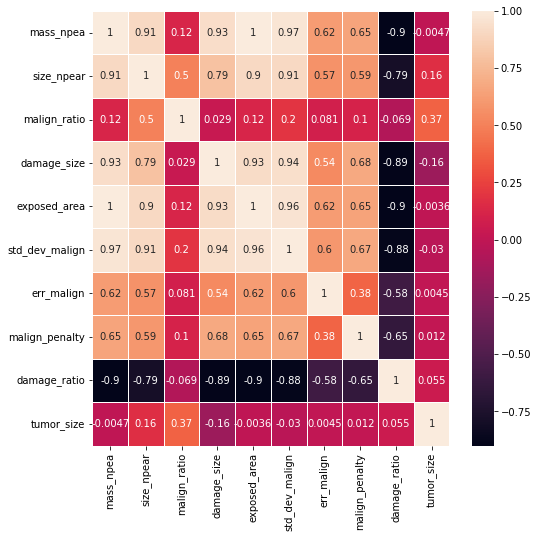

In [11]:
DataRaw = pd.read_csv("LRtrain.csv")
dataSet = DataRaw.drop(columns = ["mass_npea", "size_npear", "malign_ratio"])
dataSet.columns = ["DamageSize", "ExposedArea", "stdDev.Malignancy", "MalignancyError", "MalignancyPenalty", "DamageRatio", "TumorSize"]

names = list(dataSet.columns)

zero_not_accepted = ["DamageSize", "ExposedArea"]
for column in zero_not_accepted:
    mean = int(dataSet[column].mean(skipna=True))
    dataSet[column] = dataSet[column].replace(0, mean)
X = dataSet.drop(columns = ["TumorSize"])
Y = DataRaw.loc[:,['tumor_size']]

fig, axs = plt.subplots(figsize=(8,8))
sns.heatmap(data = DataRaw.corr(), annot=True, linewidths=0.5)



Regression Models - SGD Regression, LARS Lasso, and Kernal Ridge Regression

In [12]:
from sklearn.linear_model import LassoLars
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=41, test_size=0.20)

C:\Users\Carte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR
****Result****


C:\Users\Carte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


R2:  -14.89
Mean Squared Error:  41.3
LassoLars
****Result****
R2:  18.82
Mean Squared Error:  29.18


C:\Users\Carte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Carte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=9.0441e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Users\Carte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KernelRidge
****Result****
R2:  16.18
Mean Squared Error:  30.13


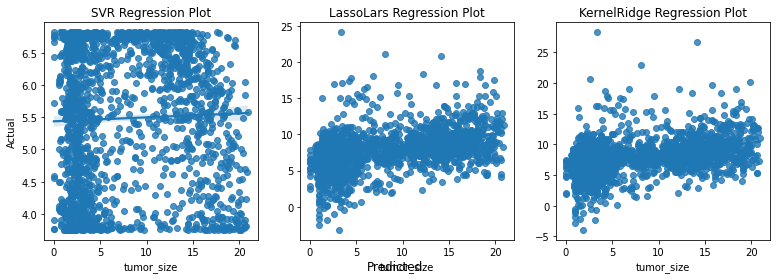

In [13]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(13,4))
f.supxlabel('Predicted')
i=1
def plotreg(name, yTest, pred,i):
    
    if i == 1:
        SVR = sns.regplot(yTest,pred, ax = ax1,)
        ax1.set_title(name + ' Regression Plot')
        ax1.set_ylabel('Actual')
    elif i == 2:
        Lars = sns.regplot(yTest, pred,ax = ax2)
        ax2.set_title(name + ' Regression Plot')
    else:
        KRR = sns.regplot(yTest, pred, ax = ax3)
        ax3.set_title(name + ' Regression Plot')


Regressor = [SVR(C=1.0, epsilon = 0.2), LassoLars(alpha=0.1, normalize=False), KernelRidge(alpha=1.0)]
for reg in Regressor:
    reg.fit(xTrain, yTrain)
    name = reg.__class__.__name__
    print('='*30)
    print(name)
    print("****Result****")
    pred = reg.predict(xTest)
    r2score = round((r2_score(yTest,pred)*100),2)
    plotreg(name, yTest, pred, i)
    i = i + 1
    MSE = round(mean_squared_error(yTest, pred),2)
    ASE = round(mean_absolute_error(yTest, pred),2)
    

    print('R2: ', r2score)
    print('Mean Squared Error: ', MSE)
